In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/VDS_VDS지점 교통량_속도_지정체 분석_1일_1일_20240825.csv',encoding='cp949')
df.head()

,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도,Unnamed: 12
0,0,0,20240825,0010VDE00100,일요일,1.4,구서IC,0.20,10,경부선,106,83.04,NaN
1,0,0,20240825,0010VDE00200,일요일,2.4,영락IC,2.02,10,경부선,103,96.24,NaN
2,0,0,20240825,0010VDE00300,일요일,3.3,영락IC,2.02,10,경부선,-1,-1.00,NaN
3,0,0,20240825,0010VDE00400,일요일,4.5,부산TG,4.01,10,경부선,-1,-1.00,NaN
4,0,0,20240825,0010VDE00500,일요일,5.1,노포IC,5.08,10,경부선,-1,-1.00,NaN


In [7]:
df['기준시간'].unique()

array([ 0,  2,  3,  1,  4,  7,  5,  8,  6,  9, 11, 12, 10, 13, 16, 14, 17,
       15, 18, 20, 21, 19, 22, 23])

In [11]:
sorted(df['기준시'].unique())

[np.int64(0),
 np.int64(15),
 np.int64(30),
 np.int64(45),
 np.int64(100),
 np.int64(115),
 np.int64(130),
 np.int64(145),
 np.int64(200),
 np.int64(215),
 np.int64(230),
 np.int64(245),
 np.int64(300),
 np.int64(315),
 np.int64(330),
 np.int64(345),
 np.int64(400),
 np.int64(415),
 np.int64(430),
 np.int64(445),
 np.int64(500),
 np.int64(515),
 np.int64(530),
 np.int64(545),
 np.int64(600),
 np.int64(615),
 np.int64(630),
 np.int64(645),
 np.int64(700),
 np.int64(715),
 np.int64(730),
 np.int64(745),
 np.int64(800),
 np.int64(815),
 np.int64(830),
 np.int64(845),
 np.int64(900),
 np.int64(915),
 np.int64(930),
 np.int64(945),
 np.int64(1000),
 np.int64(1015),
 np.int64(1030),
 np.int64(1045),
 np.int64(1100),
 np.int64(1115),
 np.int64(1130),
 np.int64(1145),
 np.int64(1200),
 np.int64(1215),
 np.int64(1230),
 np.int64(1245),
 np.int64(1300),
 np.int64(1315),
 np.int64(1330),
 np.int64(1345),
 np.int64(1400),
 np.int64(1415),
 np.int64(1430),
 np.int64(1445),
 np.int64(1500),
 np.int6

In [14]:
# create a new feature for time
df['time'] = df['기준시'].apply(lambda x: x//100 + round((x%100)/60,2))
sorted(df['time'].unique())

[np.float64(0.0),
 np.float64(0.25),
 np.float64(0.5),
 np.float64(0.75),
 np.float64(1.0),
 np.float64(1.25),
 np.float64(1.5),
 np.float64(1.75),
 np.float64(2.0),
 np.float64(2.25),
 np.float64(2.5),
 np.float64(2.75),
 np.float64(3.0),
 np.float64(3.25),
 np.float64(3.5),
 np.float64(3.75),
 np.float64(4.0),
 np.float64(4.25),
 np.float64(4.5),
 np.float64(4.75),
 np.float64(5.0),
 np.float64(5.25),
 np.float64(5.5),
 np.float64(5.75),
 np.float64(6.0),
 np.float64(6.25),
 np.float64(6.5),
 np.float64(6.75),
 np.float64(7.0),
 np.float64(7.25),
 np.float64(7.5),
 np.float64(7.75),
 np.float64(8.0),
 np.float64(8.25),
 np.float64(8.5),
 np.float64(8.75),
 np.float64(9.0),
 np.float64(9.25),
 np.float64(9.5),
 np.float64(9.75),
 np.float64(10.0),
 np.float64(10.25),
 np.float64(10.5),
 np.float64(10.75),
 np.float64(11.0),
 np.float64(11.25),
 np.float64(11.5),
 np.float64(11.75),
 np.float64(12.0),
 np.float64(12.25),
 np.float64(12.5),
 np.float64(12.75),
 np.float64(13.0),
 np.flo

In [15]:
df.head()

,기준시간,기준시,기준일,VDS_ID,요일명,지점이정,노드명,도로이정,노선번호,도로명,교통량,평균속도,Unnamed: 12,time
0,0,0,20240825,0010VDE00100,일요일,1.4,구서IC,0.20,10,경부선,106,83.04,NaN,0.0
1,0,0,20240825,0010VDE00200,일요일,2.4,영락IC,2.02,10,경부선,103,96.24,NaN,0.0
2,0,0,20240825,0010VDE00300,일요일,3.3,영락IC,2.02,10,경부선,-1,-1.00,NaN,0.0
3,0,0,20240825,0010VDE00400,일요일,4.5,부산TG,4.01,10,경부선,-1,-1.00,NaN,0.0
4,0,0,20240825,0010VDE00500,일요일,5.1,노포IC,5.08,10,경부선,-1,-1.00,NaN,0.0


In [163]:
# reduced df
rdf = df.iloc[:,[3,-1,-4,-3]]
rdf = rdf.rename(columns={'교통량':'traffic','평균속도':'velocity'})
rdf = rdf.sort_values(by=['VDS_ID','time'], ignore_index=True)
rdf.head()

,VDS_ID,time,traffic,velocity
0,0010VDE00100,0.00,106,83.04
1,0010VDE00100,0.25,104,85.59
2,0010VDE00100,0.50,82,91.17
3,0010VDE00100,0.75,79,86.03
4,0010VDE00100,1.00,83,87.22


<Axes: >

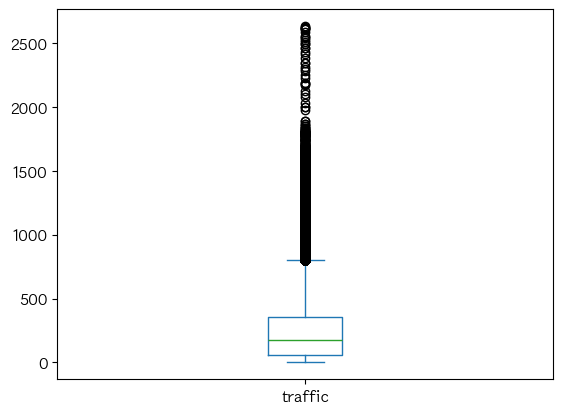

In [175]:
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')
mpl.rcParams["font.family"] = 'Binggrae?'
rdf['traffic'].plot(kind='box', x='traffic')

<Axes: >

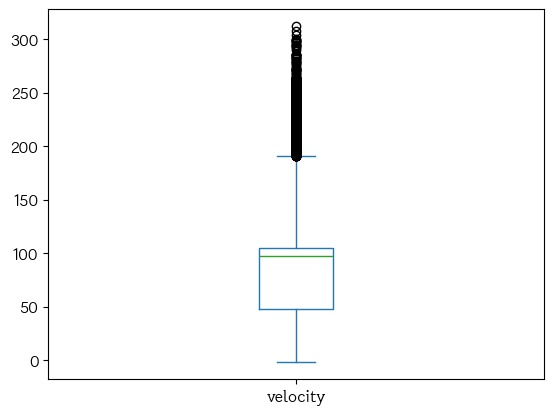

In [131]:
rdf['velocity'].plot(kind='box', x='traffic')

In [132]:
print(sorted(rdf['traffic'].unique())[:10])
print(sorted(rdf['traffic'].unique())[-10:])

[np.int64(-2), np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
[np.int64(2542), np.int64(2547), np.int64(2559), np.int64(2592), np.int64(2613), np.int64(2614), np.int64(2622), np.int64(2624), np.int64(2627), np.int64(2634)]


In [133]:
print(sorted(rdf['velocity'].unique())[:10])
print(sorted(rdf['velocity'].unique())[-10:])

[np.float64(-2.0), np.float64(-1.0), np.float64(0.0), np.float64(1.0), np.float64(1.16), np.float64(1.83), np.float64(2.0), np.float64(2.25), np.float64(2.5), np.float64(2.66)]
[np.float64(296.13), np.float64(297.36), np.float64(298.11), np.float64(298.55), np.float64(298.91), np.float64(299.01), np.float64(300.22), np.float64(303.57), np.float64(307.87), np.float64(311.93)]


In [164]:
print("# of original data : ", len(rdf))

# drop missing values
dropIdx = rdf[(rdf['traffic']<=0.1)|(rdf['velocity']<=0.1)].index
rdf = rdf.drop(dropIdx)
rdf = rdf.reset_index(drop=True)
print("# of cleansed data : ", len(rdf))

rdf.head()

# of original data :  719136
# of cleansed data :  544318


,VDS_ID,time,traffic,velocity
0,0010VDE00100,0.00,106,83.04
1,0010VDE00100,0.25,104,85.59
2,0010VDE00100,0.50,82,91.17
3,0010VDE00100,0.75,79,86.03
4,0010VDE00100,1.00,83,87.22


<Axes: >

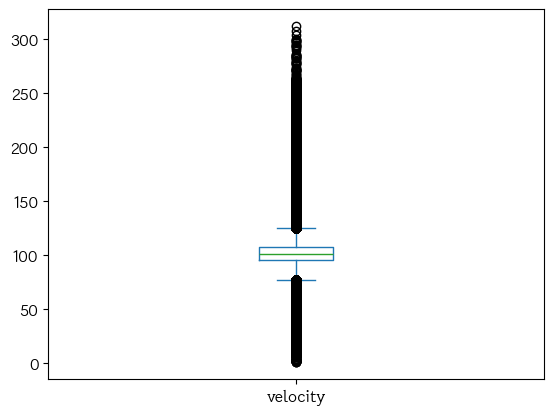

In [135]:
rdf['velocity'].plot(kind='box', x='traffic')

In [120]:
vds_0010VDE00100 = rdf[rdf['VDS_ID']=='0010VDE00100']
vds_0010VDE00100

,VDS_ID,time,traffic,velocity
0,0010VDE00100,0.00,106,83.04
1,0010VDE00100,0.25,104,85.59
2,0010VDE00100,0.50,82,91.17
3,0010VDE00100,0.75,79,86.03
4,0010VDE00100,1.00,83,87.22
...,...,...,...,...
91,0010VDE00100,22.75,122,84.81
92,0010VDE00100,23.00,128,86.33
93,0010VDE00100,23.25,96,85.24
94,0010VDE00100,23.50,105,80.35


<Axes: xlabel='time [h]', ylabel='traffic'>

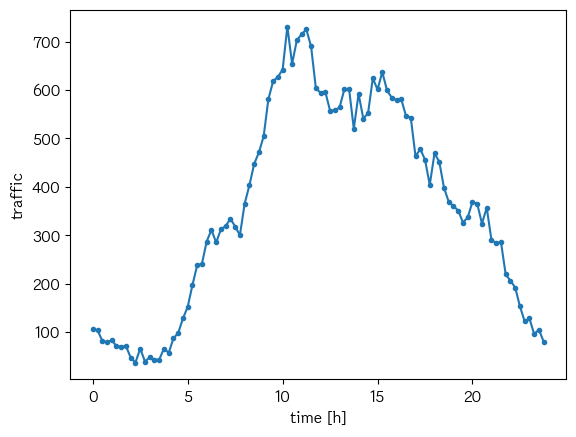

In [109]:
vds_0010VDE00100.plot(kind='line',x='time',y='traffic',xlabel='time [h]',ylabel='traffic',legend=False,style=['.-'])

<Axes: xlabel='time [h]', ylabel='velocity [km/h]'>

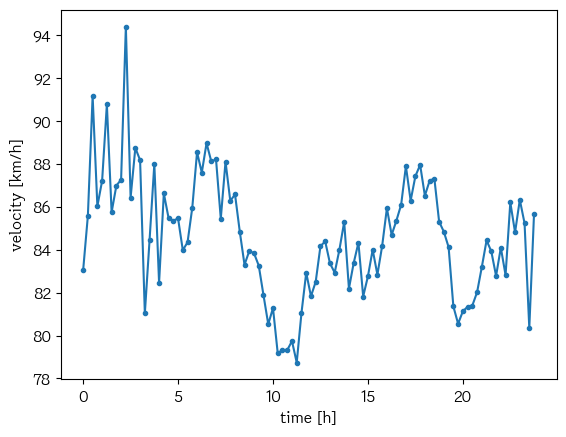

In [110]:
vds_0010VDE00100.plot(kind='line',x='time',y='velocity',xlabel='time [h]',ylabel='velocity [km/h]',legend=False,style=['.-'])

In [165]:
# does it make sense to drive at 300 km/h?
rdf[rdf['velocity']>300]['VDS_ID']

42973    0010VDS22600
42977    0010VDS22600
43068    0010VDS22700
43069    0010VDS22700
Name: VDS_ID, dtype: object

In [166]:
vds_0010VDS22700 = rdf[rdf['VDS_ID']=='vds_0010VDS22600']
vds_0010VDS22700

,VDS_ID,time,traffic,velocity


In [167]:
# those with unreasonable velocity have already been removed from data as they contain missing values.
# to make sure, let's get rid of outliers as well.

Q1 = np.percentile(rdf['velocity'], 25, method='midpoint')
Q3 = np.percentile(rdf['velocity'], 75, method='midpoint')
lowerB = Q1-1.5*(Q3-Q1)
upperB = Q1+1.5*(Q3-Q1)
print(lowerB,upperB)

77.24 113.24


In [168]:
# better ease the criteria
Q2 = np.percentile(rdf['velocity'], 2, method='midpoint')
Q98 = np.percentile(rdf['velocity'], 98, method='midpoint')
print(Q2,Q98)

71.055 167.905


In [169]:
print(len(rdf[rdf['velocity']<=Q2]),len(rdf[rdf['velocity']>=Q98]))

10887 10887


In [170]:
print("# of data in rdf : ", len(rdf))
rdf = rdf[(rdf['velocity']<Q98)&(rdf['velocity']>Q2)]
print("# of data in rdf after dropping outliers : ", len(rdf))

# of data in rdf :  544318
# of data in rdf after dropping outliers :  522544


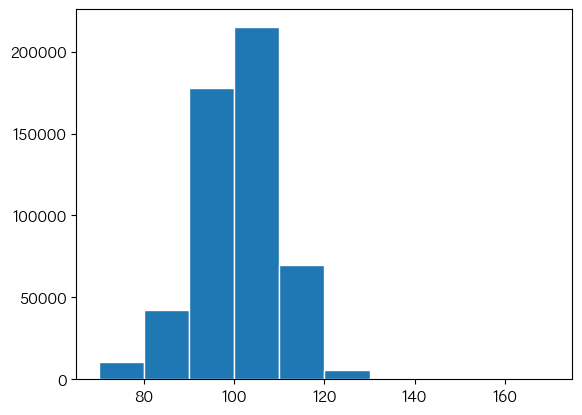

In [187]:
# mpl.rcParams["font.family"] = 'Binggrae?'
plt.hist(rdf['velocity'],bins=np.linspace(70,170,11),edgecolor='white')
plt.show()

In [188]:
rdf_12h = rdf[rdf['time']==12.0]
rdf_12h.head()

,VDS_ID,time,traffic,velocity
48,0010VDE00100,12.0,594,81.83
144,0010VDE00200,12.0,582,94.56
240,0010VDE01200,12.0,347,90.96
332,0010VDE01300,12.0,450,92.34
428,0010VDE01600,12.0,882,91.16


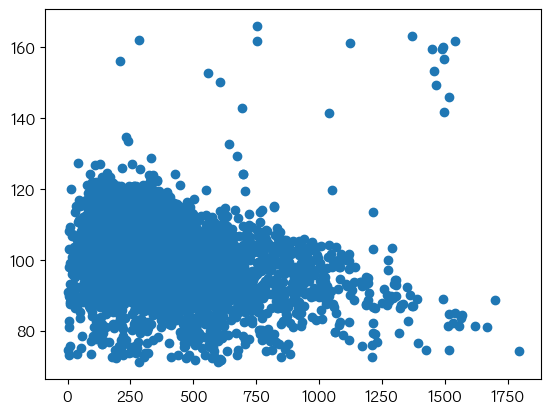

In [189]:
plt.scatter(rdf_12h['traffic'],rdf_12h['velocity'])
plt.show()

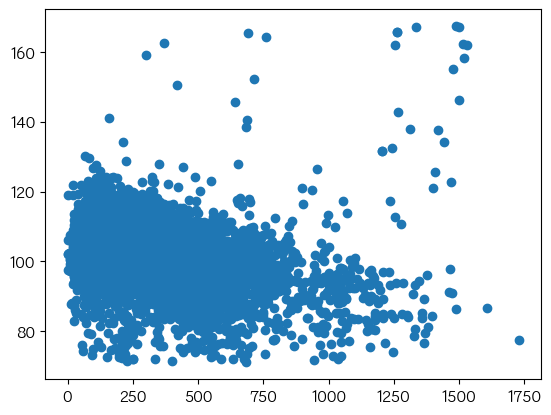

In [191]:
rdf_18h = rdf[rdf['time']==18.0]
plt.scatter(rdf_18h['traffic'],rdf_18h['velocity'])
plt.show()

In [193]:
print("# of data in rdf : ", len(rdf))

# drop row whose velocity is larger than 150 km/h
rdf_140 = rdf[rdf['velocity']<=140.0]
rdf_140 = rdf_140.reset_index(drop=True)
print("# of data in rdf_150 : ", len(rdf_140))

# of data in rdf :  522544
# of data in rdf_150 :  521408


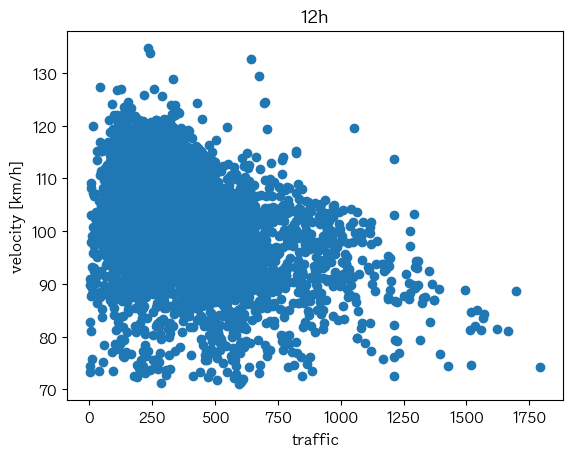

In [196]:
rdf_140_12h = rdf_140[rdf_140['time']==12.0]
plt.scatter(rdf_140_12h['traffic'],rdf_140_12h['velocity'])
plt.xlabel('traffic')
plt.ylabel('velocity [km/h]')
plt.title('12h')
plt.show()

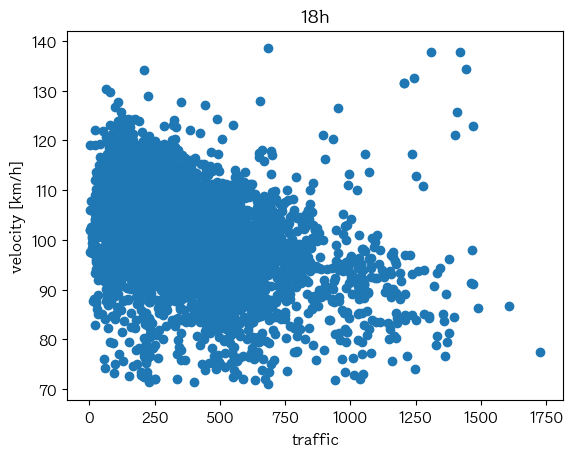

In [197]:
rdf_140_18h = rdf_140[rdf_140['time']==18.0]
plt.scatter(rdf_140_18h['traffic'],rdf_140_18h['velocity'])
plt.xlabel('traffic')
plt.ylabel('velocity [km/h]')
plt.title('18h')
plt.show()

<Axes: xlabel='traffic', ylabel='velocity'>

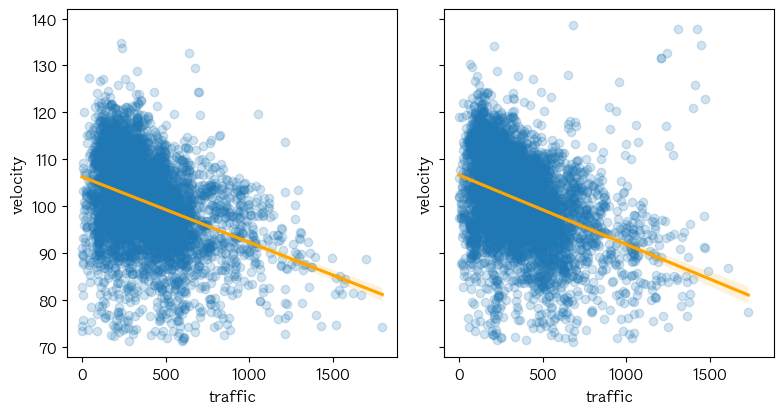

In [217]:
# scatter plot with regression line from sns
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
plt.tight_layout()
fig.set_size_inches(8,4)

sns.regplot(x='traffic',y='velocity',data=rdf_140_12h, ax=axs[0], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})
sns.regplot(x='traffic',y='velocity',data=rdf_140_18h, ax=axs[1], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})

Text(0.5, 1.0, '18h')

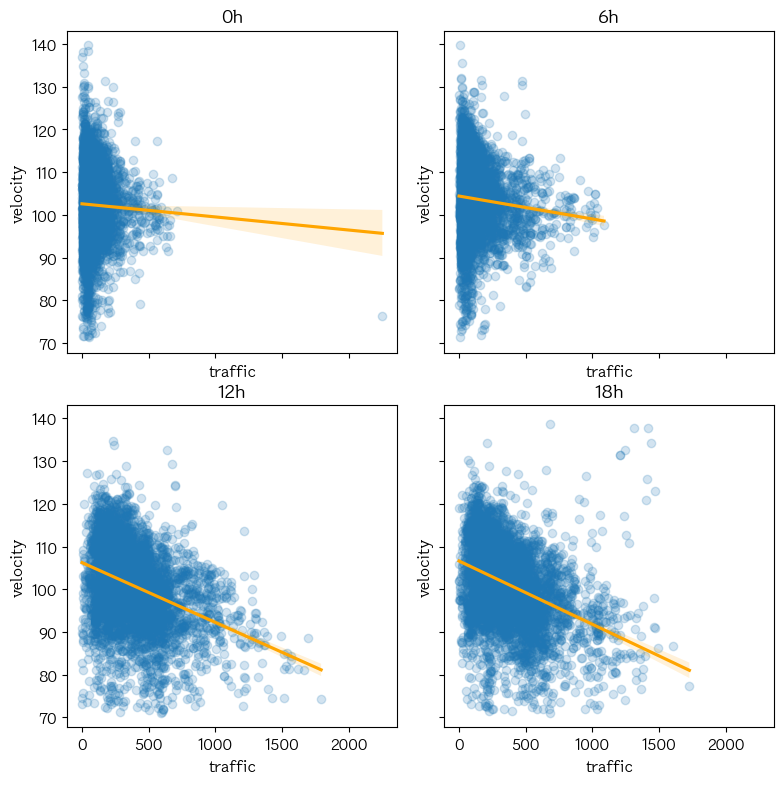

In [221]:
rdf_140_0h = rdf_140[rdf_140['time']==0.0]
rdf_140_6h = rdf_140[rdf_140['time']==6.0]
rdf_140_12h = rdf_140[rdf_140['time']==12.0]
rdf_140_18h = rdf_140[rdf_140['time']==18.0]

# scatter plot with regression line from sns
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
plt.tight_layout()
fig.set_size_inches(8,8)

sns.regplot(x='traffic',y='velocity',data=rdf_140_0h, ax=axs[0,0], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})
sns.regplot(x='traffic',y='velocity',data=rdf_140_6h, ax=axs[0,1], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})
sns.regplot(x='traffic',y='velocity',data=rdf_140_12h, ax=axs[1,0], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})
sns.regplot(x='traffic',y='velocity',data=rdf_140_18h, ax=axs[1,1], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})

axs[0,0].set_title('0h')
axs[0,1].set_title('6h')
axs[1,0].set_title('12h')
axs[1,1].set_title('18h')

In [243]:
def draw_oneday(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    df_list = []
    for i in range(24):
        df_list.append(data[data['time']==i])

    fig, axs = plt.subplots(6,4, sharex=True, sharey=True, figsize=(10,10))
    plt.tight_layout(pad=2.5)

    for i in range(24):
        sns.regplot(x='traffic',y='velocity',data=df_list[i], ax=axs[i//4,i%4], scatter_kws={'alpha':0.2},line_kws={'color':'orange'})
        axs[i//4,i%4].set_title(str(i//4+i%4)+'h')

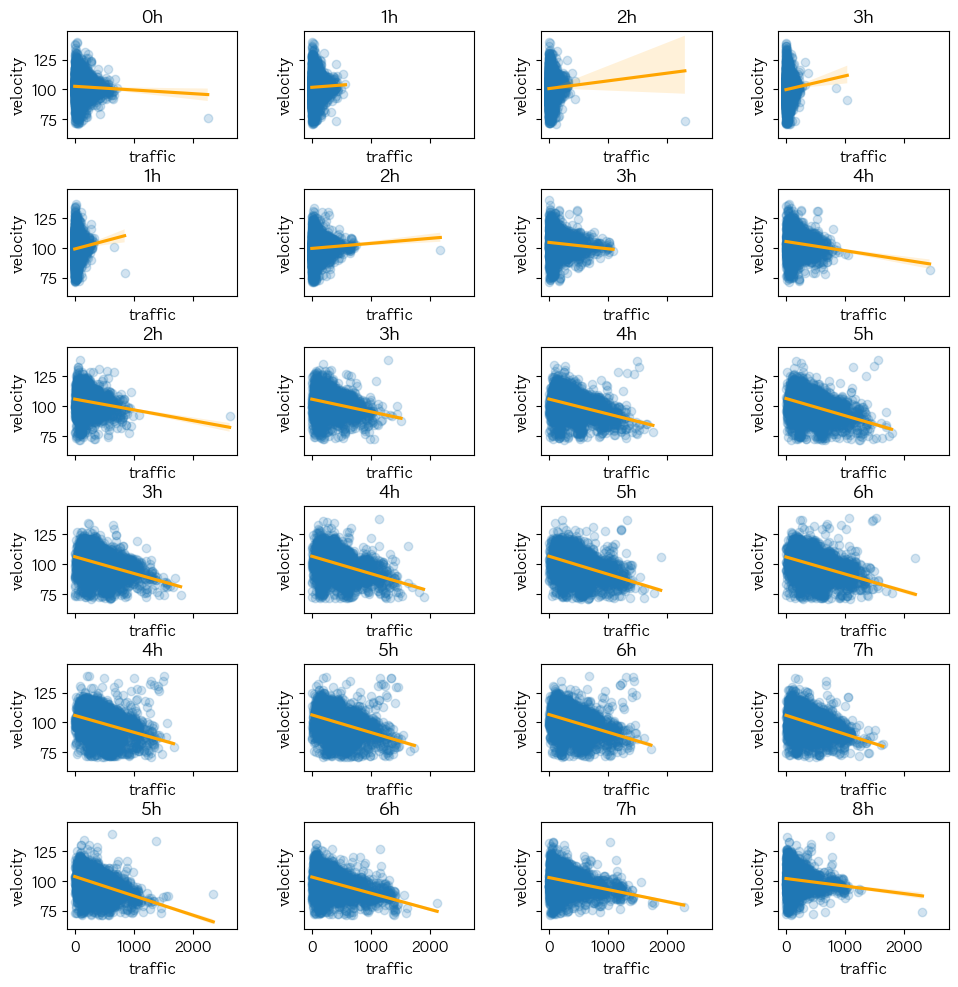

In [244]:
draw_oneday(rdf_140)

In [254]:
# what about turning them into an animation? To this end, refer to https://matplotlib.org/stable/users/explain/animations/animations.html
import matplotlib.animation as animation

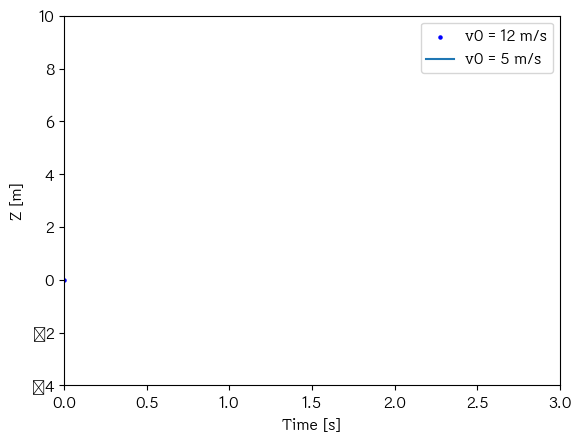

In [257]:
# the first example code from matplotlib tutorial:
mpl.rcParams["font.family"] = 'Binggrae?'
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

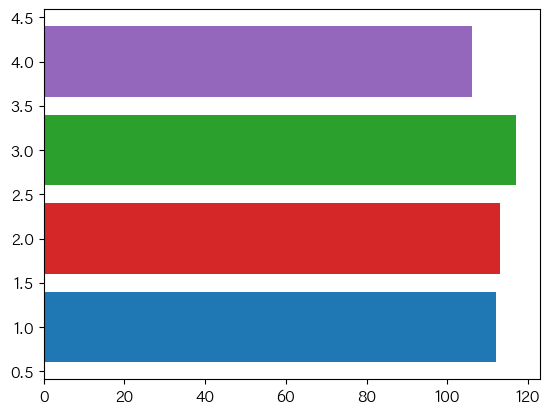

In [256]:
# the second example code from matplotlib tutorial:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()

In [ ]:
# why isn't it working? :(